In [39]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [40]:
# Loading train dataset
train = pd.read_csv('train.csv')
train.shape # (57214, 49)

# Dropping the unnamed column
train = train.drop(columns = 'Unnamed: 0')
train.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,5,18,1,1,?,...,No,No,No,No,No,No,No,No,No,-1
1,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,-1


In [41]:
# Loading test dataset 
test = pd.read_csv('test.csv')
test.shape # (14304, 49)

# Dropping the unnamed column
test = test.drop(columns = 'Unnamed: 0')

In [42]:
# Examining the distribution of the target var
train.readmitted.value_counts()

# Changing the values of the response variable in train data
train['readmitted'] = train['readmitted'].replace(-1, 0)

# Doing the same in the test data
test['readmitted'] = test['readmitted'].replace(-1, 0)

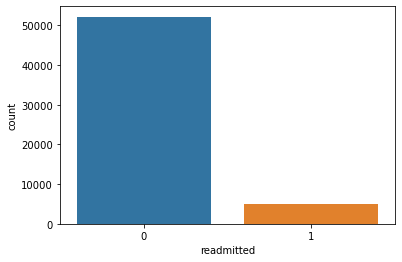

In [43]:
sns.countplot(x = 'readmitted', data = train);

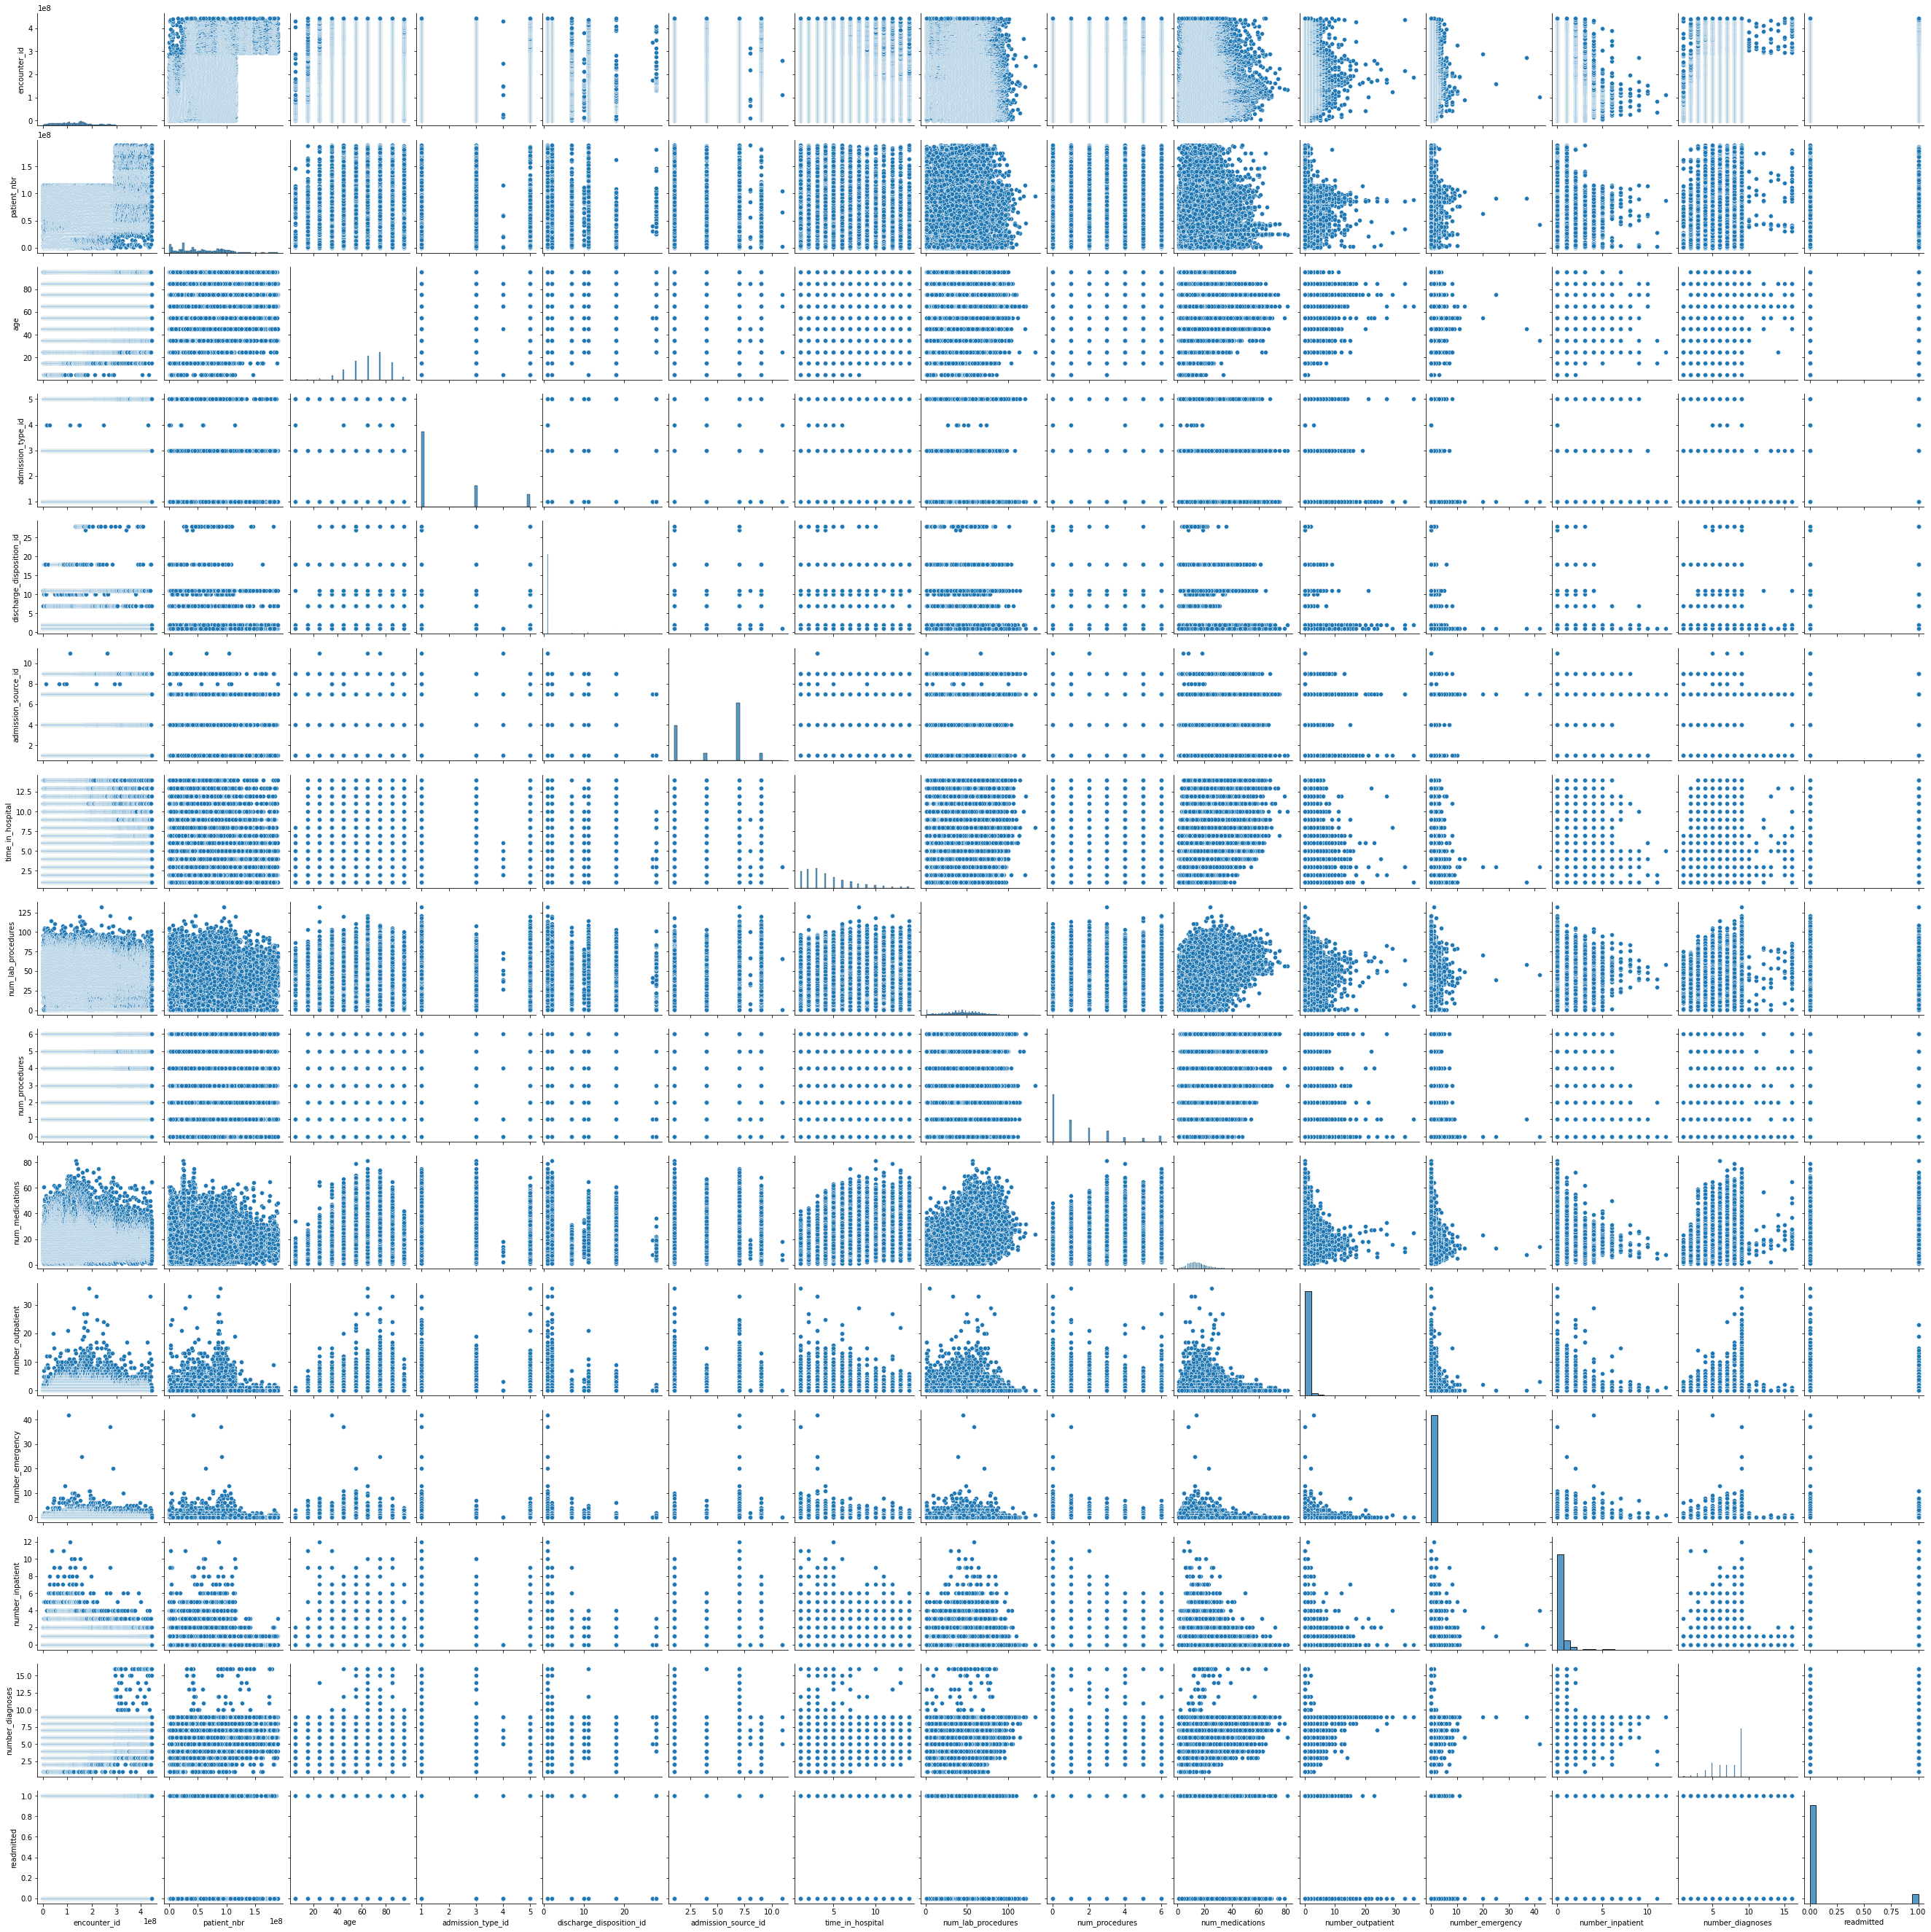

In [44]:
# Creating a pairplot of the varaibles in the data
sns.pairplot(data = train)

In [62]:
# Fitting a model with only demographic characteristics (race, gender & age)
logit_model = sm.logit(formula = 'readmitted~time_in_hospital+age+discharge_disposition_id', data = train).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.296055
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                57214
Model:                          Logit   Df Residuals:                    57210
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Feb 2023   Pseudo R-squ.:                0.006987
Time:                        12:39:37   Log-Likelihood:                -16938.
converged:                       True   LL-Null:                       -17058.
Covariance Type:            nonrobust   LLR p-value:                 2.135e-51
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.1682      0.069    -45.895      0.000      -3.304      -3.033
time_in_hospital             0.0532      0.005     11.281      0.000       0.044       0.062
age                          0.0086      0.001      8.828      0.000       0.007       0.011
discharge_disposition_id     0.0072      0.004      1.972      0.049     4.6e-05       0.014
============================================================================================
"""

In [63]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 91.2%


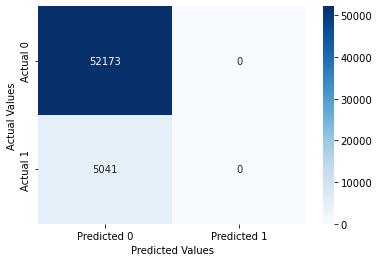

In [64]:
cm = confusion_matrix_train(logit_model)

In [65]:
# Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 91.2%


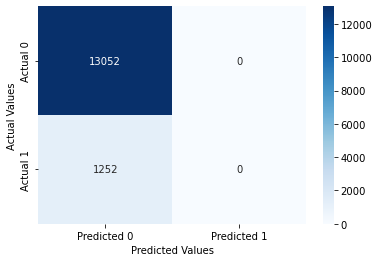

In [66]:
confusion_matrix_test(test, test.readmitted,logit_model)